In [29]:
#get some random data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.datasets import load_digits
digits = load_digits()

In [30]:
print("images shape: %s" % str(digits.images.shape))
print("targets shape: %s" % str(digits.target.shape))

images shape: (1797, 8, 8)
targets shape: (1797,)


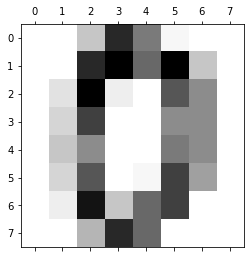

In [31]:
plt.matshow(digits.images[0], cmap=plt.cm.Greys);

In [32]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [33]:
#Prepare the data
X = digits.data.reshape(-1, 64)
print(X.shape)

(1797, 64)


In [34]:
y= digits.target
print(y.shape)

(1797,)


In [35]:
#X.shape is always (n_samples, n_feature)
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [36]:
#PCA Principal Component Analysis
from sklearn.decomposition import PCA

In [37]:
#Instantine the model. Set parameters
pca = PCA(n_components=2)

In [38]:
#Fit the model
pca.fit(X);

In [39]:
#Apply the model. 
X_pca = pca.transform(X)
X_pca.shape

(1797, 2)

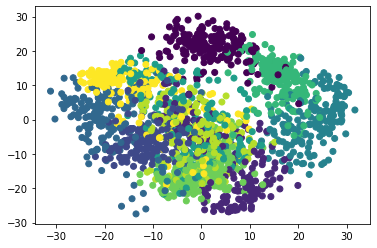

In [40]:
plt.figsize=(16, 10)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y);

In [41]:
print(pca.mean_.shape)
print(pca.components_.shape)

(64,)
(2, 64)


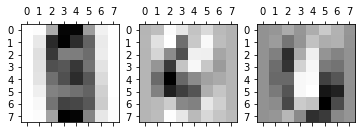

In [42]:
fix, ax = plt.subplots(1, 3)
ax[0].matshow(pca.mean_.reshape(8, 8), cmap=plt.cm.Greys)
ax[1].matshow(pca.components_[0, :].reshape(8, 8), cmap=plt.cm.Greys)
ax[2].matshow(pca.components_[1, :].reshape(8, 8), cmap=plt.cm.Greys)

In [43]:
#Isomap
from sklearn.manifold import Isomap

In [44]:
#Instantiate the model. Set parameters. 
isomap = Isomap(n_components=2, n_neighbors=20)

In [45]:
#Fit the model
isomap.fit(X);

In [46]:
#Apply the model
X_isomap = isomap.transform(X)
X_isomap.shape

(1797, 2)

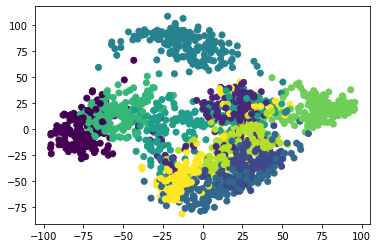

In [47]:
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y);

In [49]:
#Classification
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (1347, 64)
y_train shape: (1347,)
X_test shape: (450, 64)
y_test shape: (450,)


In [55]:
#Linear SVMs
from sklearn.svm import LinearSVC

In [56]:
#finds a linear separation between the classes
#instantiate the model
svm = LinearSVC()

In [57]:
#fit the model using the known labels
svm.fit(X_train, y_train);

C:\Users\agnie\anaconda3\envs\PythonData\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [58]:
#apply the model. for supervised algorithms, this is predict
svm.predict(X_train)

array([2, 8, 9, ..., 7, 7, 8])

In [59]:
#evaluate the model
svm.score(X_train, y_train)

0.994060876020787

In [60]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier